In [5]:
print("importing modules")
import torch
import utilities
print("done")
data_dict = torch.load("MNIST_images_size_2048")
images = data_dict["images"]
labels = data_dict["labels"]
BATCH_SIZE = data_dict["BATCH_SIZE"]


importing modules
done


C:\Users\Josh\AppData\Local\Temp\ipykernel_12344\3027848542.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load("MNIST_images_size_2048")


In [6]:
from scipy.signal import convolve2d
import numpy as np


In [7]:
images[0].squeeze(0).numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Edge detection

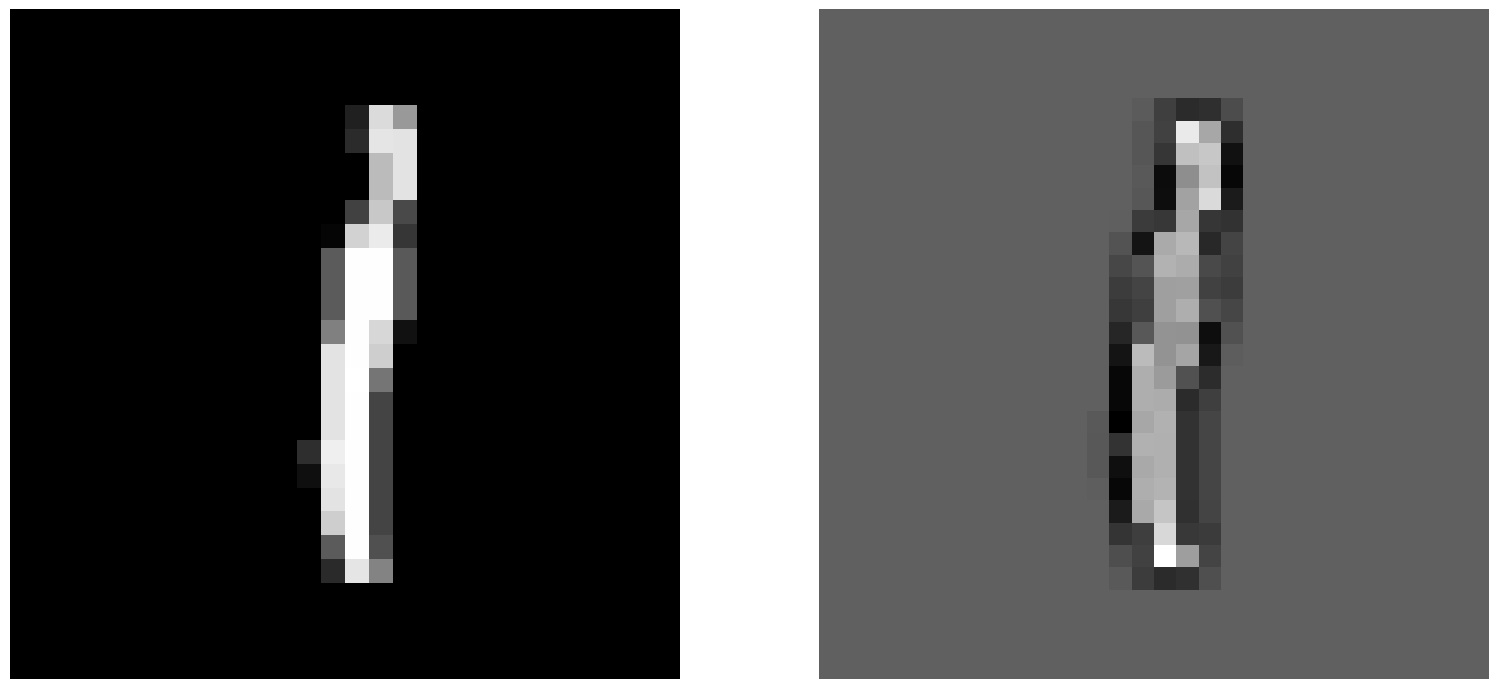

In [8]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
utilities.graph_images([images[0], torch.from_numpy(convolve2d(images[0].squeeze(0).numpy(), kernel)).unsqueeze(0)], BATCH_SIZE=10)



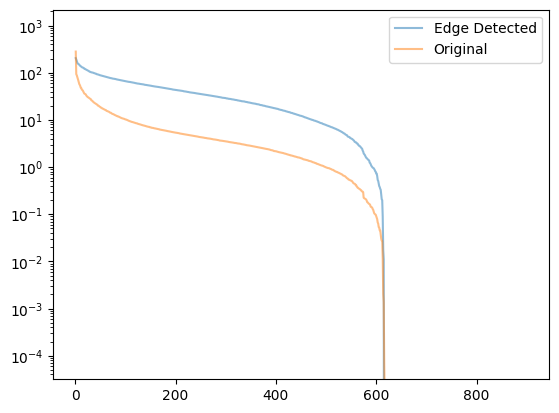

In [9]:
edge_images = []
for image in images:
    edge_images.append(torch.from_numpy(convolve2d(image.squeeze(0).numpy(), kernel)).unsqueeze(0))
edge_images = torch.stack(edge_images)
U, edgeS, V = utilities.get_SVD_decomp(edge_images)
_, originalSVDS, _ = utilities.get_SVD_decomp(images)

utilities.graph_SVDs([edgeS, originalSVDS], ["Edge Detected", "Original"])

Sharpen

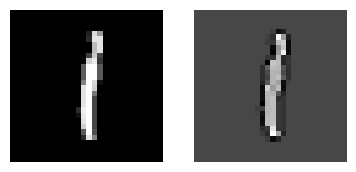

In [10]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened_image = torch.from_numpy(convolve2d(images[0].squeeze(0).numpy(), kernel)).unsqueeze(0)
utilities.graph_images([images[0], sharpened_image])



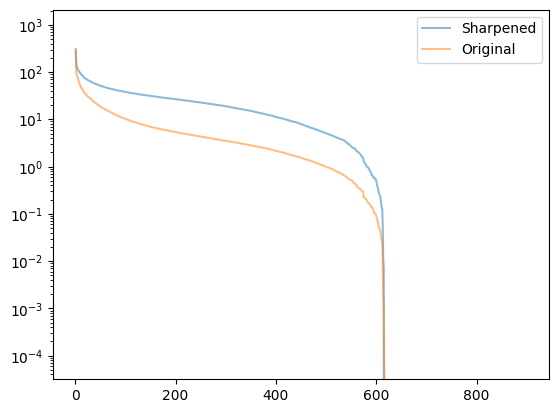

In [11]:
sharpened_images = []
for image in images:
    sharpened_images.append(torch.from_numpy(convolve2d(image.squeeze(0).numpy(), kernel)).unsqueeze(0))
sharpened_images = torch.stack(sharpened_images)
U, sharpenedS, V = utilities.get_SVD_decomp(sharpened_images)
_, originalSVDS, _ = utilities.get_SVD_decomp(images)

utilities.graph_SVDs([sharpenedS, originalSVDS], ["Sharpened", "Original"])

Blur

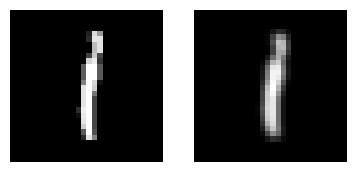

In [23]:
kernel =(1/16) * np.array([[1,2,1],[2,4,2],[1,2,1]])
blurred_image = torch.from_numpy(convolve2d(images[0].squeeze(0).numpy(), kernel)).unsqueeze(0)
utilities.graph_images([images[0], blurred_image])



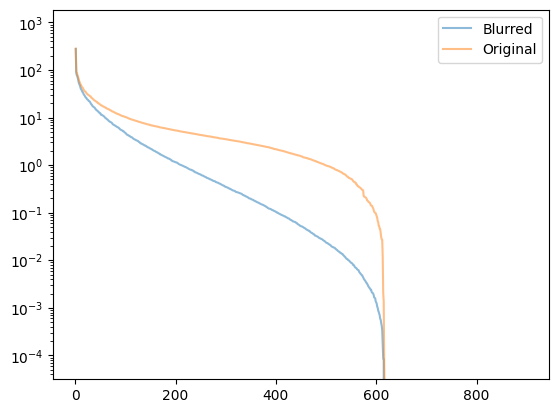

In [13]:
blurred_images = []
for image in images:
    blurred_images.append(torch.from_numpy(convolve2d(image.squeeze(0).numpy(), kernel)).unsqueeze(0))
blurred_images = torch.stack(blurred_images)
U, blurredS, V = utilities.get_SVD_decomp(blurred_images)
_, originalSVDS, _ = utilities.get_SVD_decomp(images)

utilities.graph_SVDs([blurredS, originalSVDS], ["Blurred", "Original"])

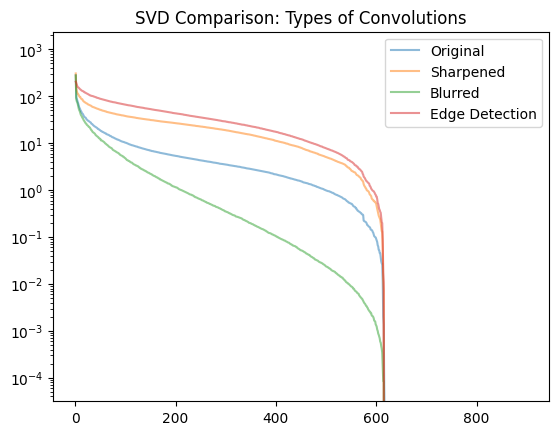

In [14]:
utilities.graph_SVDs([originalSVDS,sharpenedS,blurredS,edgeS], ["Original", "Sharpened", "Blurred", "Edge Detection"], title="SVD Comparison: Types of Convolutions")

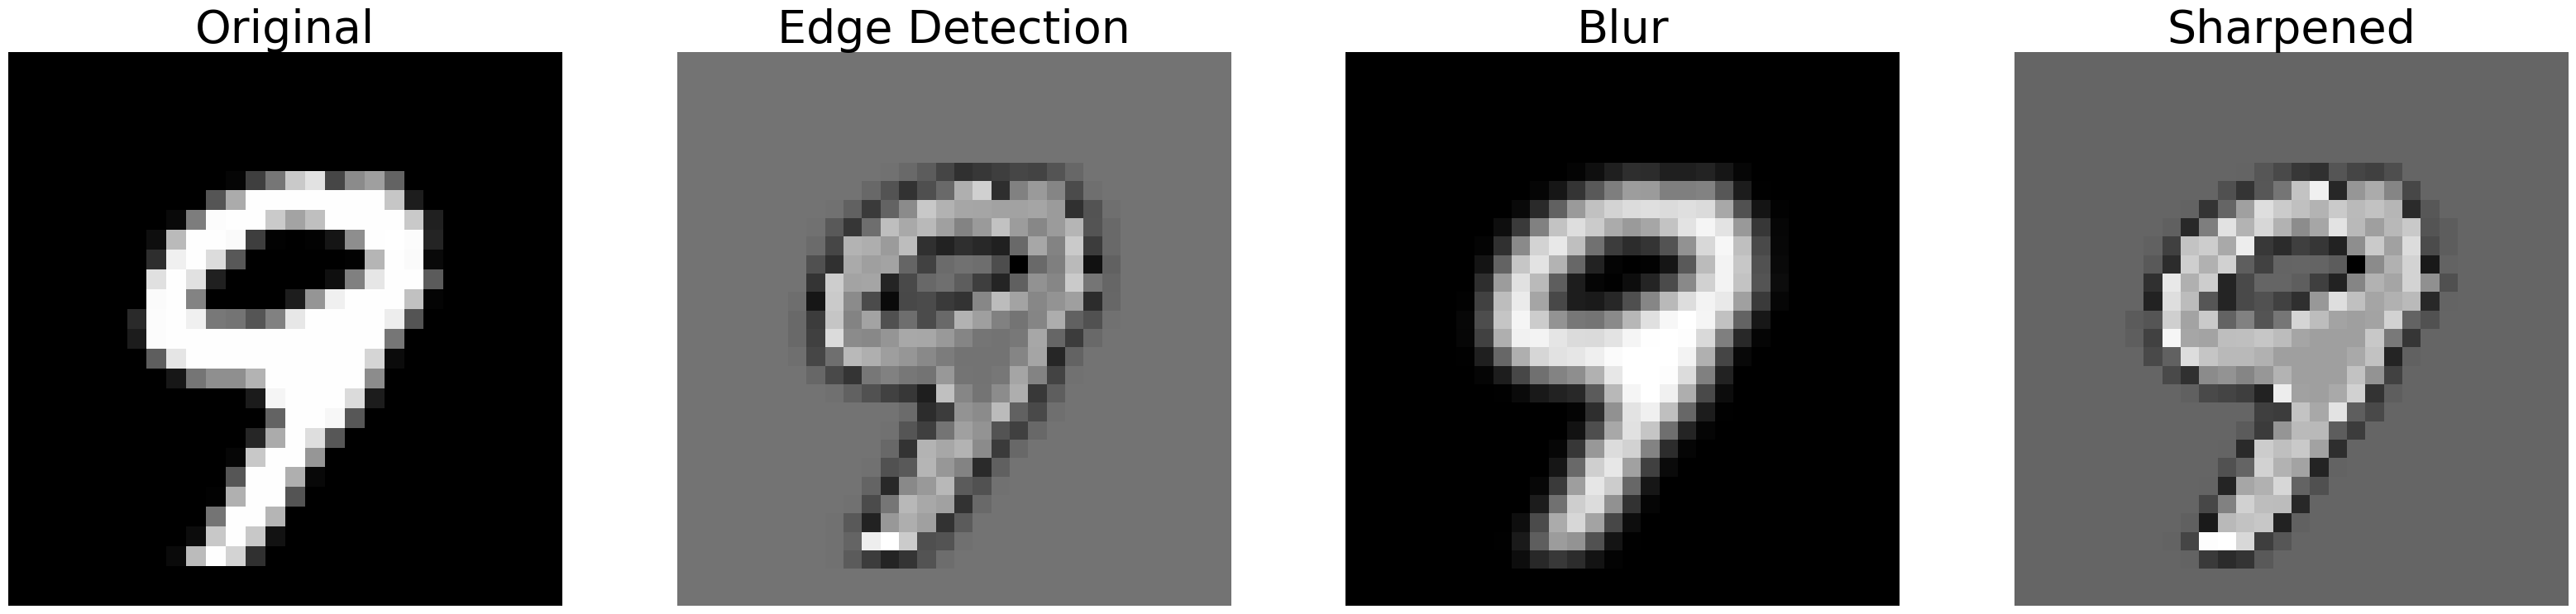

In [22]:
num = 4
utilities.graph_images([images[num], edge_images[num], blurred_images[num], sharpened_images[num]], ["Original", "Edge Detection", "Blur", "Sharpened"],font_size=40, BATCH_SIZE=10)